In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
from scipy import stats
import sys
import statsmodels.stats.multicomp as mc

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
PlottingFormat_Folder = '/Users/seetha/Box Sync/MultiDayData/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

In [3]:
from placecellparams import Combinedplots as cp

In [4]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolder = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/Placecellparams/'

In [5]:
getdata = cp(FolderName=DirectoryName, CombinedDataFolder=CombinedFolder)

Int64Index([ 302,  305,  325,  423,  635,  721,  824,  892,  904,  936, 1190,
            1224, 1226, 1253, 1258, 1282, 1286, 1295, 1296, 1326, 1338, 1339,
            1348, 1356, 1366, 1374, 1415, 1426, 1469, 1473, 1484, 1491, 1504,
            1509, 1540, 1550, 1557, 1565, 1566, 1583, 1587, 1606, 1607, 1652,
            1667, 1671, 1672, 1716, 1717, 1728, 1744, 1766, 1770, 1851, 1869,
            1902, 1906],
           dtype='int64')
Int64Index([1855, 1857, 1875, 1884, 1945, 1948, 2028, 2037, 2065, 2066, 2068,
            2073, 2085, 2108, 2109, 2169, 2185, 2248, 2332, 2355, 2368, 2429,
            2545, 2548, 2608, 2680, 2689, 2690, 2761, 2781, 2796, 2803, 2815,
            2822, 2823, 2828, 2843, 2886, 2908, 2930, 2950, 2958, 3061],
           dtype='int64')
Int64Index([3029, 3030, 3076, 3135, 3153, 3248, 3261, 3268, 3281, 3356, 3365,
            3478, 3500, 3520, 3586, 3590, 3634, 3659, 3671, 3737, 3758, 3776,
            4080, 4088, 4105, 4172, 4192, 4216, 4251, 4305, 4315, 4669

10047
Test Multiple Comparison ttest_rel 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 Task1  Task2 -1.5205  0.203       1.0  False
 Task1  Task3  6.0517 0.0038    0.0376   True
 Task1  Task4  7.8006 0.0015    0.0146   True
 Task1  Task5  0.8405  0.448       1.0  False
 Task2  Task3   6.098 0.0037    0.0366   True
 Task2  Task4  9.9776 0.0006    0.0057   True
 Task2  Task5  1.0502 0.3529       1.0  False
 Task3  Task4 -1.3103 0.2603       1.0  False
 Task3  Task5 -1.8809 0.1331       1.0  False
 Task4  Task5 -1.3093 0.2606       1.0  False
---------------------------------------------
Test Multiple Comparison ttest_rel 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
 Task1  Task2   1.6318 0.1781       1.0  False
 Task1  Task3  -7.3651 0.0018    0.0181   True
 Task1  Task4 -12.2182

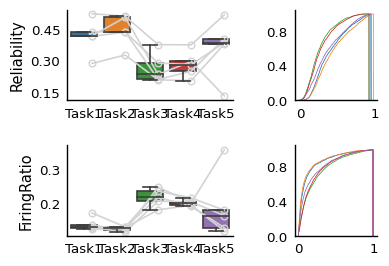

In [6]:
columns_to_plot = ['Reliability', 'FiringRatio']
fs, ax = plt.subplots(len(columns_to_plot), 2, dpi=100, 
                      gridspec_kw={'width_ratios':[1, 0.5], 'wspace': 0.5, 'hspace': 0.5})

getdata.plot_pfparams(ax, tasks_to_plot=['Task1', 'Task2', 'Task3', 'Task4', 'Task5'], 
                      columns_to_plot=columns_to_plot, alltaskpresent=False)
fs.set_size_inches((4, 3))
# fs.savefig(os.path.join(SaveFigureFolder, 'Placecellparams_rereward.pdf'), bbox_inches='tight')

## Stats

In [7]:
tasks_to_plot=['Task1', 'Task2', 'Task3', 'Task4', 'Task5']
for i in columns_to_plot:
    df = getdata.pfparam_combined[['Task', i]]
    df = df[df['Task'].isin(tasks_to_plot)]
    comp1 = mc.MultiComparison(df[i], df['Task'])
    tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf")
    print(i)
    print(tbl)

Reliability
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
 Task1  Task2  -4.1915    0.0    0.0003   True
 Task1  Task3  22.6602    0.0       0.0   True
 Task1  Task4  18.9703    0.0       0.0   True
 Task1  Task5   4.5864    0.0       0.0   True
 Task2  Task3   27.485    0.0       0.0   True
 Task2  Task4  23.5854    0.0       0.0   True
 Task2  Task5   8.8248    0.0       0.0   True
 Task3  Task4  -3.3559 0.0008     0.008   True
 Task3  Task5  -17.171    0.0       0.0   True
 Task4  Task5 -13.6737    0.0       0.0   True
----------------------------------------------
FiringRatio
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
 Task1  Task2   1.6854  0.092    0.9199  False
 Task1  Task3 -12.2455    0.0       0.

In [8]:
#Degrees of freedom
for i in columns_to_plot:
    df = getdata.pfparam_combined[['Task', i]]
    print(i)
    for t in tasks_to_plot:
        print(t, len(df[df['Task']==t]))

Reliability
Task1 1722
Task2 1895
Task3 2355
Task4 2101
Task5 1974
FiringRatio
Task1 1722
Task2 1895
Task3 2355
Task4 2101
Task5 1974


(40,)
P-Value : Beg : tstat: -0.172, p 0.866
P-Value : Mid : tstat: 3.270, p 0.002
P-Value : End : tstat: -3.395, p 0.009
(40,)
P-Value : Beg : tstat: 0.177, p 0.862
P-Value : Mid : tstat: 2.731, p 0.010
P-Value : End : tstat: -3.756, p 0.006
(40,)
P-Value : Beg : tstat: -3.331, p 0.004
P-Value : Mid : tstat: 4.364, p 0.000
P-Value : End : tstat: -1.644, p 0.139
(40,)
P-Value : Beg : tstat: -2.302, p 0.034
P-Value : Mid : tstat: 1.889, p 0.066
P-Value : End : tstat: -1.279, p 0.237
(40,)
P-Value : Beg : tstat: -1.361, p 0.190
P-Value : Mid : tstat: 1.804, p 0.079
P-Value : End : tstat: -2.595, p 0.032


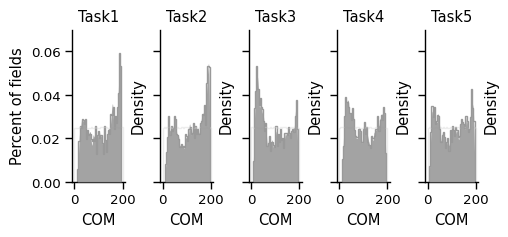

In [26]:
fs, ax = plt.subplots(1, 5, dpi=100, sharex='all', sharey='all')
getdata.plot_com_hist(ax, getdata.pfparam_combined, tasks_to_plot=['Task1', 'Task2', 'Task3', 'Task4', 'Task5'])
fs.tight_layout()
fs.set_size_inches((5, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Placecelloverrep_reward.pdf'), bbox_inches='tight')

TaskName      Task1      Task2     Task3      Task4      Task5
count      5.000000   5.000000  5.000000   5.000000   5.000000
mean      12.723843   9.283080  1.066622  -0.848720   2.346625
std        4.854666   8.050622  4.676285  10.185069   9.575042
min        8.561644  -3.308824 -5.244755 -12.769231 -11.702128
25%        9.007353   7.941176 -2.398524  -9.629630  -3.267974
50%       11.748634   9.583333  2.839931   0.602410   6.726457
75%       13.760504  14.387211  4.588910   6.733524   9.024390
max       20.541082  17.812500  5.547550  10.819328  10.952381
Task1
Task2
Task3
Task4
Task5
Ttest_relResult(statistic=1.248686916412227, pvalue=0.27987180769686726)
Ttest_relResult(statistic=6.442872555094022, pvalue=0.002986178162114292)
Ttest_relResult(statistic=3.674802336255024, pvalue=0.021301008944381552)
Ttest_relResult(statistic=3.466478827123919, pvalue=0.025665776456805026)


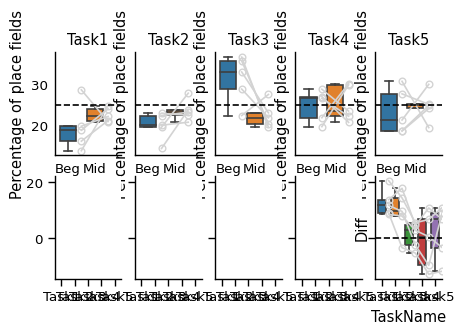

In [21]:
fs, ax = plt.subplots(2, 5, dpi=100, sharex='row', sharey='row')
ax = ax.flatten()
df = getdata.calculate_ratiofiring_atrewzone(ax, getdata.pfparam_combined, 
                                           tasks_to_compare=['Task1', 'Task2', 'Task3', 'Task4', 'Task5'], 
                                      ranges=np.arange(0, 225,50), rows_to_plot=['Beg', 'Mid'])
fs.set_size_inches((5, 3))
fs.savefig(os.path.join(SaveFigureFolder, 'Placecelloverrep_ratios_reward_Beg_Mid.pdf'), bbox_inches='tight')

In [25]:
tasks_to_compare=['Task1', 'Task2', 'Task3', 'Task4']
for t in tasks_to_compare:
    data1 = df[df['TaskName']==t]['End']
    data2 = df[df['TaskName']==t]['Mid']
    ts, p = scipy.stats.ttest_rel(data1, data2)
    print('Task %s: tstat: %0.3f, pvalue: %0.3f' %(t, ts, p))

Task Task1: tstat: 5.861, pvalue: 0.004
Task Task2: tstat: 2.578, pvalue: 0.061
Task Task3: tstat: 0.510, pvalue: 0.637
Task Task4: tstat: -0.186, pvalue: 0.861


## Divide by reliability

## Common cells

In [ ]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/CommonPCs/'

In [ ]:
getdata = cp(FolderName=DirectoryName, CombinedDataFolder=CombinedFolder)

In [ ]:
columns_to_plot = ['Reliability', 'FiringRatio']
tasks_to_plot=['Task1', 'Task2', 'Task3', 'Task4', 'Task5']
fs, ax = plt.subplots(len(columns_to_plot), 2, dpi=100, 
                      gridspec_kw={'width_ratios':[1, 0.5], 'wspace': 0.5, 'hspace': 0.5})

getdata.plot_pfparams(ax, tasks_to_plot=tasks_to_plot, 
                      columns_to_plot=columns_to_plot, alltaskpresent=False, commoncellflag=True)
fs.set_size_inches((4, 3))
fs.savefig(os.path.join(SaveFigureFolder, 'Placecellparams_Commoncells.pdf'), bbox_inches='tight')

In [ ]:
celldf = getdata.get_cells_pertask_peranimal(tasks_to_plot)
updatedpf_param = getdata.update_pfparams_withcommoncells(celldf, tasks_to_plot)
commondf = updatedpf_param[(updatedpf_param['Task'].isin(tasks_to_plot)) & (updatedpf_param['CommonCells'])]
for i in columns_to_plot:
    df = commondf[['Task', i]]
    comp1 = mc.MultiComparison(df[i], df['Task'])
    tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf")
    print(tbl)

In [ ]:
fs, ax = plt.subplots(1, len(tasks_to_plot), dpi=100, sharex='all', sharey='all', figsize=(10, 3))
getdata.plot_com_hist(ax, commondf, tasks_to_plot=tasks_to_plot)
fs.tight_layout()
fs.set_size_inches((5, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Placecelloverrep_commoncells.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(2, 5, dpi=100, sharex='row', sharey='row')
ax = ax.flatten()
df = getdata.calculate_ratiofiring_atrewzone(ax, commondf, 
                                           tasks_to_compare=tasks_to_plot, 
                                      ranges=np.arange(0, 225,50))
fs.set_size_inches((5, 3))
fs.savefig(os.path.join(SaveFigureFolder, 'Placecellparams_Commoncells_ratio.pdf'), bbox_inches='tight')

## COM

In [ ]:
taskstoplot=['Task1', 'Task2', 'Task3', 'Task4', 'Task5']
comdf = {k:[] for k in taskstoplot+['CellNum', 'Animal']}
celldf = getdata.get_cells_pertask_peranimal(taskstoplot)
updatedpf_param = getdata.update_pfparams_withcommoncells(celldf, tasks_to_plot)

for a in getdata.animals:
    commoncells = celldf[celldf[taskstoplot].sum(axis=1)==len(taskstoplot)]['CellNum']
    for c in commoncells:
        thisdf = updatedpf_param[(updatedpf_param['CellNumber']==c) & (updatedpf_param['animalname']==a)]
        if np.any(thisdf['NumPlacecells']>1):
            continue
        comdf['Animal'].append(a)
        comdf['CellNum'].append(c)
        for t in taskstoplot:
            com = thisdf[thisdf['Task']==t]['WeightedCOM'].to_numpy()
            if len(com)==0:
                comdf[t].append(np.nan)
            else:
                comdf[t].append(com[0])
comdf = pd.DataFrame.from_dict(comdf)
comdf = comdf.dropna()

In [ ]:
fs, ax = plt.subplots(1, len(taskstoplot)-1, figsize=(10, 3), sharex='all', sharey='all')
 
for n, t2 in enumerate(taskstoplot[1:]):
    ax[n].scatter(comdf['Task1'], comdf[t2], color='k', s=5, alpha=0.5, marker='+')
    ax[n].set_ylabel('Task1')
    ax[n].set_xlabel(t2)
    ax[n].plot([0, 40], [0, 40], ls="--", c=".3")

for a in ax:
    a.set_xlim((0, 40))
    a.set_ylim((0, 40))
    pf.set_axes_style(a)
    
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Remapping_commoncells.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(1)
for n, t2 in enumerate(taskstoplot[1:]):
    diff = np.asarray(comdf['Task1']-comdf[t2])
    mean = np.mean(diff)
    print(t2, np.mean(diff))
    sem = scipy.stats.sem(diff)
    ax.bar(n, mean, yerr=sem)
ax.set_ylim((0, 2))
#     ax.boxplot(diff, positions=[n], showfliers=False)
# #     ax.plot(np.ones_like(diff)*n+0.25, diff, 'k.')

In [ ]:
fs, ax = plt.subplots(1, len(taskstoplot)-1, figsize=(10, 3), sharex='all', sharey='all')

for n, (t1, t2) in enumerate(zip(taskstoplot[:-1], taskstoplot[1:])):
    ax[n].scatter(comdf[t1], comdf[t2], color='k', s=5, alpha=0.5, marker='+')
    ax[n].set_ylabel(t1)
    ax[n].set_xlabel(t2)
    ax[n].plot([0, 40], [0, 40], ls="--", c=".3")

for a in ax:
    a.set_xlim((0, 40))
    a.set_ylim((0, 40))
    pf.set_axes_style(a)
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Remapping_commoncells_withprevtask.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(1)
animaldiff_withTask1 = {k:[] for k in taskstoplot}
animaldiff_withprevtask = {k:[] for k in taskstoplot}
for n1, (t1, t2) in enumerate(zip(taskstoplot[:-1], taskstoplot[1:])):
    diff1 = np.abs(np.asarray(comdf['Task1']-comdf[t2]))*5
    diff2 = np.abs(np.asarray(comdf[t1]-comdf[t2]))*5
    add = -0.25
    for n2, i in enumerate([diff1, diff2]):
        mean = np.mean(i)
        sem = scipy.stats.sem(i)
        print(n2, t2, mean, sem)
        ax.bar(n1+add, mean, yerr=sem, width=0.4)
        add = 0.25
    
    # Animal Wise
    add = -0.25
    for a in comdf['Animal'].unique():
        thisanimaldf = comdf[comdf['Animal']==a]
        diff1 = np.abs(np.asarray(thisanimaldf['Task1']-thisanimaldf[t2]))*5
        diff2 = np.abs(np.asarray(thisanimaldf[t1]-thisanimaldf[t2]))*5
        ax.plot([n1-0.25, n1+0.25], [np.mean(diff1), np.mean(diff2)], 'k.-')
        animaldiff_withTask1[t2].append(np.mean(diff1))
        animaldiff_withprevtask[t2].append(np.mean(diff2))
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Remapping_diff.pdf'), bbox_inches='tight')

In [ ]:
for t in (taskstoplot[2:]):
    tstat, p = scipy.stats.ttest_rel(animaldiff_withTask1['Task2'], animaldiff_withTask1[t])
    print(t, tstat, p)

In [ ]:
for t in taskstoplot[1:]:
    tstat, p = scipy.stats.ttest_rel(animaldiff_withprevtask[t], animaldiff_withTask1[t])
    print(t, tstat, p)

In [ ]:
for n, t2 in enumerate(taskstoplot[1:]):
    diff = np.abs(np.asarray(comdf['Task1']-comdf[t2]))*5
    mean = np.mean(diff)
    ci = stats.norm.interval(alpha=0.99, loc=np.mean(diff), scale=stats.sem(diff))
    print('Mean %0.3f, CI %0.3f' %(mean, mean-ci[0]))

In [ ]:
for n, (t1, t2) in enumerate(zip(taskstoplot[:-1], taskstoplot[1:])):
    print(t1, t2)
    diff = np.abs(np.asarray(comdf[t1]-comdf[t2]))*5
    mean = np.mean(diff)
    ci = stats.norm.interval(alpha=0.99, loc=np.mean(diff), scale=stats.sem(diff))
    print('Mean %0.3f, CI %0.3f' %(mean, mean-ci[0]))